<a href="https://colab.research.google.com/github/nv-hiep/R/blob/main/Water_Quality_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Wrangling in R

Water Quality

https://colab.research.google.com/notebook#create=true&language=r

# Load library

In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(stringr)
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




# Read data

In [3]:
# Read in the dataset
water <- read_csv('http://594442.youcanlearnit.net/austinwater.csv')
glimpse(water)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  RESULT = col_double(),
  SAMPLE_SITE_NO = col_double(),
  DEPTH_IN_METERS = col_double(),
  DATA_REF_NO = col_double(),
  LAT_DD_WGS84 = col_double(),
  LON_DD_WGS84 = col_double(),
  SAMPLE_REF_NO = col_double(),
  TIME_NULL = col_logical()
)
ℹ Use `spec()` for the full column specifications.




Rows: 1,122,275
Columns: 24
$ WATERSHED       <chr> "Barton Creek", "Barton Creek", "Barton Creek", "Barto…
$ SAMPLE_DATE     <chr> "07/18/2013 02:58:00 PM", "07/18/2013 02:58:00 PM", "0…
$ SITE_NAME       <chr> "Old Mill (Sunken Gardens) Spring", "Old Mill (Sunken …
$ SITE_TYPE       <chr> "Spring", "Spring", "Spring", "Spring", "Spring", "Spr…
$ MEDIUM          <chr> "Benthic Cover", "Benthic Cover", "Benthic Cover", "Be…
$ PARAM_TYPE      <chr> "Benthic Macroinvertebrates", "Benthic Macroinvertebra…
$ PARAMETER       <chr> "ANNELIDA (WORM/LEECHES/PLANARIA)", "CRAYFISH (ADULT)"…
$ QUALIFIER       <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ RESULT          <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0,…
$ UNIT            <chr> "1=Present; 0=Absent", "Relative Abundance (1): <20 (2…
$ FILTER          <chr> "Total", "Total", "Total", "Larvae", "Larvae", "Total"…
$ SAMPLE_ID       <chr> "CW", "CW", "CW", "CW", "CW", "CW", "CW", "CW", "CW", …
$ SAMPLE_SIT

In [4]:
head(water)

WATERSHED,SAMPLE_DATE,SITE_NAME,SITE_TYPE,MEDIUM,PARAM_TYPE,PARAMETER,QUALIFIER,RESULT,UNIT,⋯,METHOD,QC_FLAG,PROJECT,Location,DATA_REF_NO,LAT_DD_WGS84,LON_DD_WGS84,SAMPLE_REF_NO,TIME_NULL,QC_TYPE
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>
Barton Creek,07/18/2013 02:58:00 PM,Old Mill (Sunken Gardens) Spring,Spring,Benthic Cover,Benthic Macroinvertebrates,ANNELIDA (WORM/LEECHES/PLANARIA),NA,1,1=Present; 0=Absent,⋯,VISUAL ASSESSMENT,U,Barton Springs Salamander,"(30.2635848609854, -97.7680757366172)",2227594,30.26358,-97.76808,440459,FALSE,NA
Barton Creek,07/18/2013 02:58:00 PM,Old Mill (Sunken Gardens) Spring,Spring,Benthic Cover,Benthic Macroinvertebrates,CRAYFISH (ADULT),NA,2,Relative Abundance (1): <20 (2): 21-50 (3): >50,⋯,VISUAL ASSESSMENT,U,Barton Springs Salamander,"(30.2635848609854, -97.7680757366172)",2227586,30.26358,-97.76808,440459,FALSE,NA
Barton Creek,07/18/2013 02:58:00 PM,Old Mill (Sunken Gardens) Spring,Spring,Benthic Cover,Benthic Macroinvertebrates,CRAYFISH (JUVENILE),NA,1,Relative Abundance (1): <20 (2): 21-50 (3): >50,⋯,VISUAL ASSESSMENT,U,Barton Springs Salamander,"(30.2635848609854, -97.7680757366172)",2227585,30.26358,-97.76808,440459,FALSE,NA
Barton Creek,07/18/2013 02:58:00 PM,Old Mill (Sunken Gardens) Spring,Spring,Benthic Cover,Benthic Macroinvertebrates,DIPTERA (MIDGE/FLY),NA,1,1=Present; 0=Absent,⋯,VISUAL ASSESSMENT,U,Barton Springs Salamander,"(30.2635848609854, -97.7680757366172)",2227591,30.26358,-97.76808,440459,FALSE,NA
Barton Creek,07/18/2013 02:58:00 PM,Old Mill (Sunken Gardens) Spring,Spring,Benthic Cover,Benthic Macroinvertebrates,EPHEMEROPTERA (MAYFLY),NA,1,1=Present; 0=Absent,⋯,VISUAL ASSESSMENT,U,Barton Springs Salamander,"(30.2635848609854, -97.7680757366172)",2227589,30.26358,-97.76808,440459,FALSE,NA
Barton Creek,07/18/2013 02:58:00 PM,Old Mill (Sunken Gardens) Spring,Spring,Benthic Cover,Benthic Macroinvertebrates,MOLLUSCA,NA,1,1=Present; 0=Absent,⋯,VISUAL ASSESSMENT,U,Barton Springs Salamander,"(30.2635848609854, -97.7680757366172)",2227595,30.26358,-97.76808,440459,FALSE,NA


In [6]:
summary(water)

  WATERSHED         SAMPLE_DATE         SITE_NAME          SITE_TYPE        
 Length:1122275     Length:1122275     Length:1122275     Length:1122275    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
    MEDIUM           PARAM_TYPE         PARAMETER          QUALIFIER        
 Length:1122275     Length:1122275     Length:1122275     Length:1122275    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

In [10]:
cat('Number of columns:', length(colnames(water)), '\n' )
print( paste('Number of columns:', length(colnames(water))) )
colnames(water)

Number of columns: 24 
[1] "Number of columns: 24"


[1] "WATERSHED"       "SAMPLE_DATE"     "SITE_NAME"       "SITE_TYPE"      
 [5] "MEDIUM"          "PARAM_TYPE"      "PARAMETER"       "QUALIFIER"      
 [9] "RESULT"          "UNIT"            "FILTER"          "SAMPLE_ID"      
[13] "SAMPLE_SITE_NO"  "DEPTH_IN_METERS" "METHOD"          "QC_FLAG"        
[17] "PROJECT"         "Location"        "DATA_REF_NO"     "LAT_DD_WGS84"   
[21] "LON_DD_WGS84"    "SAMPLE_REF_NO"   "TIME_NULL"       "QC_TYPE"

In [13]:
cat('Number of (row and columns):', dim(water) )

Number of (row and columns): 1122275 24

# Data Cleaning / Data Wrangling

Convert from wide to long

In [14]:
glimpse(water)

Rows: 1,122,275
Columns: 24
$ WATERSHED       <chr> "Barton Creek", "Barton Creek", "Barton Creek", "Barto…
$ SAMPLE_DATE     <chr> "07/18/2013 02:58:00 PM", "07/18/2013 02:58:00 PM", "0…
$ SITE_NAME       <chr> "Old Mill (Sunken Gardens) Spring", "Old Mill (Sunken …
$ SITE_TYPE       <chr> "Spring", "Spring", "Spring", "Spring", "Spring", "Spr…
$ MEDIUM          <chr> "Benthic Cover", "Benthic Cover", "Benthic Cover", "Be…
$ PARAM_TYPE      <chr> "Benthic Macroinvertebrates", "Benthic Macroinvertebra…
$ PARAMETER       <chr> "ANNELIDA (WORM/LEECHES/PLANARIA)", "CRAYFISH (ADULT)"…
$ QUALIFIER       <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ RESULT          <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0,…
$ UNIT            <chr> "1=Present; 0=Absent", "Relative Abundance (1): <20 (2…
$ FILTER          <chr> "Total", "Total", "Total", "Larvae", "Larvae", "Total"…
$ SAMPLE_ID       <chr> "CW", "CW", "CW", "CW", "CW", "CW", "CW", "CW", "CW", …
$ SAMPLE_SIT

In [15]:
# Remove some columns
water <- tibble('siteName'=water$SITE_NAME,
                'siteType'=water$SITE_TYPE,
                'sampleTime'=water$SAMPLE_DATE,
                'parameterType'=water$PARAM_TYPE,
                'parameter'=water$PARAMETER,
                'result'=water$RESULT,
                'unit'=water$UNIT)

glimpse(water)

Rows: 1,122,275
Columns: 7
$ siteName      <chr> "Old Mill (Sunken Gardens) Spring", "Old Mill (Sunken Ga…
$ siteType      <chr> "Spring", "Spring", "Spring", "Spring", "Spring", "Sprin…
$ sampleTime    <chr> "07/18/2013 02:58:00 PM", "07/18/2013 02:58:00 PM", "07/…
$ parameterType <chr> "Benthic Macroinvertebrates", "Benthic Macroinvertebrate…
$ parameter     <chr> "ANNELIDA (WORM/LEECHES/PLANARIA)", "CRAYFISH (ADULT)", …
$ result        <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0…
$ unit          <chr> "1=Present; 0=Absent", "Relative Abundance (1): <20 (2):…


In [18]:
# Get unique parameter
print(unique(water$parameter))

   [1] "ANNELIDA (WORM/LEECHES/PLANARIA)"                                
   [2] "CRAYFISH (ADULT)"                                                
   [3] "CRAYFISH (JUVENILE)"                                             
   [4] "DIPTERA (MIDGE/FLY)"                                             
   [5] "EPHEMEROPTERA (MAYFLY)"                                          
   [6] "MOLLUSCA"                                                        
   [7] "ODONATA (DAMSELFLY/DRAGONFLY)"                                   
   [8] "OTHER INVERTEBRATES"                                             
   [9] "PETROPHILA (MOTH)"                                               
  [10] "PSEPHENIDAE (WATER PENNIES)"                                     
  [11] "TRICHOPTERA (CADDISFLY)"                                         
  [12] "FISH"                                                            
  [13] "BEDROCK"                                                         
  [14] "BOULDER(>256MM)"              

In [19]:
# Row ids for "PH*"
ph_rows <- which(str_detect(water$parameter, "PH"))
print(ph_rows)

    [1]      5      9     10     19     21     22     29     47     52     56
   [11]     57     67     69     70     77     96    101    105    106    115
   [21]    117    118    125    144    149    153    154    163    165    166
   [31]    173    176    179    200    201    213    214    219    225    230
   [41]    234    243    247    248    258    264    266    267    274    292
   [51]    298    302    303    312    314    315    322    347    353    357
   [61]    358    368    370    371    378    411    412    421    422    429
   [71]    430    431    432    449    450    453    454    455    456    469
   [81]    470    508    509    519    520    527    528    529    530    547
   [91]    548    551    552    553    554    567    568    609    614    619
  [101]    647    652    655    656    664    666    667    674    690    695
  [111]    699    700    708    710    711    718    735    740    744    745
  [121]    753    755    756    763    788    789    792    800 

In [23]:
# Data of "PH*"
head(water[ph_rows,])

siteName,siteType,sampleTime,parameterType,parameter,result,unit
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
Old Mill (Sunken Gardens) Spring,Spring,07/18/2013 02:58:00 PM,Benthic Macroinvertebrates,EPHEMEROPTERA (MAYFLY),1,1=Present; 0=Absent
Old Mill (Sunken Gardens) Spring,Spring,07/18/2013 02:58:00 PM,Benthic Macroinvertebrates,PETROPHILA (MOTH),0,1=Present; 0=Absent
Old Mill (Sunken Gardens) Spring,Spring,07/18/2013 02:58:00 PM,Benthic Macroinvertebrates,PSEPHENIDAE (WATER PENNIES),1,1=Present; 0=Absent
Old Mill (Sunken Gardens) Spring,Spring,07/18/2013 02:58:00 PM,Grain Size/Substrate Characterization,PERCENT BRYOPHYTE COVER,1,(%) Percent
Old Mill (Sunken Gardens) Spring,Spring,07/18/2013 02:58:00 PM,Habitat Evaluation,AQUATIC MACROPHYTE - EMERGENT,0,(%) Percent
Old Mill (Sunken Gardens) Spring,Spring,07/18/2013 02:58:00 PM,Habitat Evaluation,AQUATIC MACROPHYTE - SUBMERGENT,0,(%) Percent


In [25]:
# Check unique parameters of "PH*"
print( unique(water[ph_rows,]$parameter) )

  [1] "EPHEMEROPTERA (MAYFLY)"                              
  [2] "PETROPHILA (MOTH)"                                   
  [3] "PSEPHENIDAE (WATER PENNIES)"                         
  [4] "PERCENT BRYOPHYTE COVER"                             
  [5] "AQUATIC MACROPHYTE - EMERGENT"                       
  [6] "AQUATIC MACROPHYTE - SUBMERGENT"                     
  [7] "AMPHIBIAN/REPTILE (ABUNDANCE)"                       
  [8] "AMPHIPODA"                                           
  [9] "PH"                                                  
 [10] "ORTHOPHOSPHORUS AS P"                                
 [11] "PHOSPHORUS AS P"                                     
 [12] "ALKALINITY PHENOLPHTHALEIN"                          
 [13] "PHYSELLA"                                            
 [14] "NUMBER OF EPHEMEROPTERA TAXA"                        
 [15] "AMPHORA LIBYCA"                                      
 [16] "AMPHORA PEDICULUS"                                   
 [17] "ENCYONOPSIS MICRO

In [26]:
# Take a look ar parameter_type
print( unique(water$parameterType) )

 [1] "Benthic Macroinvertebrates"           
 [2] "Fish"                                 
 [3] "Grain Size/Substrate Characterization"
 [4] "Habitat Evaluation"                   
 [5] "Physicals"                            
 [6] "Salamanders"                          
 [7] "Spatial"                              
 [8] "Temporal"                             
 [9] "Flow/Rainfall"                        
[10] "Alkalinity/Hardness/pH"               
[11] "Conventionals"                        
[12] "Metals"                               
[13] "Nutrients"                            
[14] "Oxygen"                               
[15] "Sample Collection Methods"            
[16] "Solids/Conductivity"                  
[17] "Bacteria/Pathogens"                   
[18] "Clarity"                              
[19] "Environmental Conditions"             
[20] "PAHs"                                 
[21] "Major Ions"                           
[22] "Calculated Metrics"                   
[23] "Chan

In [27]:
filtered_tib <- subset( water, (parameterType == "Alkalinity/Hardness/pH") | (parameterType == "Conventionals") )
glimpse(filtered_tib)

Rows: 59,001
Columns: 7
$ siteName      <chr> "North Branch of Sycamore Creek @ Foster Ranch Rd", "Nor…
$ siteType      <chr> "Stream", "Stream", "Spring", "Spring", "Stream", "Strea…
$ sampleTime    <chr> "01/21/2015 12:00:00 PM", "01/21/2015 12:00:00 PM", "01/…
$ parameterType <chr> "Alkalinity/Hardness/pH", "Conventionals", "Alkalinity/H…
$ parameter     <chr> "PH", "WATER TEMPERATURE", "PH", "WATER TEMPERATURE", "P…
$ result        <dbl> 8.35, 11.73, 7.82, 18.29, 8.15, 8.09, 8.47, 8.12, 8.61, …
$ unit          <chr> "Standard units", "Deg. Celsius", "Standard units", "Deg…


In [28]:
head(filtered_tib)

siteName,siteType,sampleTime,parameterType,parameter,result,unit
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
North Branch of Sycamore Creek @ Foster Ranch Rd,Stream,01/21/2015 12:00:00 PM,Alkalinity/Hardness/pH,PH,8.35,Standard units
North Branch of Sycamore Creek @ Foster Ranch Rd,Stream,01/21/2015 12:00:00 PM,Conventionals,WATER TEMPERATURE,11.73,Deg. Celsius
Rimrock Spring 67,Spring,01/21/2015 11:30:00 AM,Alkalinity/Hardness/pH,PH,7.82,Standard units
Barton Scenic Bluff Spring,Spring,01/21/2015 09:45:00 AM,Conventionals,WATER TEMPERATURE,18.29,Deg. Celsius
Barton Creek Downstream of Lost Creek Blvd,Stream,01/14/2015 01:31:00 PM,Alkalinity/Hardness/pH,PH,8.15,Standard units
Barton Creek @ Ogletree Pool,Stream,01/14/2015 12:32:00 PM,Alkalinity/Hardness/pH,PH,8.09,Standard units


In [31]:
print(unique(filtered_tib$parameter))

 [1] "PH"                                   
 [2] "WATER TEMPERATURE"                    
 [3] "ALKALINITY (AS CACO3)"                
 [4] "ALKALINITY BICARBONATE (AS CACO3)"    
 [5] "ALKALINITY CARBONATE (AS CACO3)"      
 [6] "ALKALINITY HYDROXIDE (AS CACO3)"      
 [7] "ALKALINITY PHENOLPHTHALEIN"           
 [8] "HARDNESS (AS CACO3)"                  
 [9] "24-HOUR AVG PH"                       
[10] "24-HOUR MAX PH"                       
[11] "24-HOUR MIN PH"                       
[12] "NUMBER OF PH MEASUREMENTS IN 24-HOURS"
[13] "OXIDATION-REDUCTION_POTENTIAL"        
[14] "BICARBONATE (AS HCO3)"                
[15] "CALCIUM+MAGNESIUM HARDNESS (AS CACO3)"
[16] "CARBONATE (AS CO3)"                   


In [33]:
filtered_tib <- subset( filtered_tib, (parameter == "PH") | (parameter == "WATER TEMPERATURE") )
glimpse(filtered_tib)

Rows: 51,797
Columns: 7
$ siteName      <chr> "North Branch of Sycamore Creek @ Foster Ranch Rd", "Nor…
$ siteType      <chr> "Stream", "Stream", "Spring", "Spring", "Stream", "Strea…
$ sampleTime    <chr> "01/21/2015 12:00:00 PM", "01/21/2015 12:00:00 PM", "01/…
$ parameterType <chr> "Alkalinity/Hardness/pH", "Conventionals", "Alkalinity/H…
$ parameter     <chr> "PH", "WATER TEMPERATURE", "PH", "WATER TEMPERATURE", "P…
$ result        <dbl> 8.35, 11.73, 7.82, 18.29, 8.15, 8.09, 8.47, 8.12, 8.61, …
$ unit          <chr> "Standard units", "Deg. Celsius", "Standard units", "Deg…


In [34]:
summary(filtered_tib)

   siteName           siteType          sampleTime        parameterType     
 Length:51797       Length:51797       Length:51797       Length:51797      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
  parameter             result              unit          
 Length:51797       Min.   :      0.1   Length:51797      
 Class :character   1st Qu.:      7.7   Class :character  
 Mode  :character   Median :      9.8   Mode  :character  
                    Mean   :     45.7                     
                    3rd Qu.:     21.1                     
                    Max.   :11

In [35]:
filtered_tib$siteType <- as.factor( filtered_tib$siteType )
filtered_tib$unit <- as.factor( filtered_tib$unit )
filtered_tib$parameter <- as.factor( filtered_tib$parameter )
filtered_tib$parameterType <- as.factor( filtered_tib$parameterType )

In [36]:
summary(filtered_tib)

   siteName                                      siteType    
 Length:51797       Stream                           :24091  
 Class :character   Lake                             :16852  
 Mode  :character   Spring                           : 7248  
                    Well                             : 1607  
                    Soil                             : 1591  
                    Non-spatial or Protected Location:  218  
                    (Other)                          :  190  
  sampleTime                       parameterType               parameter    
 Length:51797       Alkalinity/Hardness/pH:25624   PH               :25624  
 Class :character   Conventionals         :26173   WATER TEMPERATURE:26173  
 Mode  :character                                                           
                                                                            
                                                                            
                                          

In [37]:
filtered_tib$sampleTime <- mdy_hms(filtered_tib$sampleTime)
head(filtered_tib)

siteName,siteType,sampleTime,parameterType,parameter,result,unit
<chr>,<fct>,<dttm>,<fct>,<fct>,<dbl>,<fct>
North Branch of Sycamore Creek @ Foster Ranch Rd,Stream,2015-01-21 12:00:00,Alkalinity/Hardness/pH,PH,8.35,Standard units
North Branch of Sycamore Creek @ Foster Ranch Rd,Stream,2015-01-21 12:00:00,Conventionals,WATER TEMPERATURE,11.73,Deg. Celsius
Rimrock Spring 67,Spring,2015-01-21 11:30:00,Alkalinity/Hardness/pH,PH,7.82,Standard units
Barton Scenic Bluff Spring,Spring,2015-01-21 09:45:00,Conventionals,WATER TEMPERATURE,18.29,Deg. Celsius
Barton Creek Downstream of Lost Creek Blvd,Stream,2015-01-14 13:31:00,Alkalinity/Hardness/pH,PH,8.15,Standard units
Barton Creek @ Ogletree Pool,Stream,2015-01-14 12:32:00,Alkalinity/Hardness/pH,PH,8.09,Standard units


In [38]:
# Check data entry errors
summary(filtered_tib)

   siteName                                      siteType    
 Length:51797       Stream                           :24091  
 Class :character   Lake                             :16852  
 Mode  :character   Spring                           : 7248  
                    Well                             : 1607  
                    Soil                             : 1591  
                    Non-spatial or Protected Location:  218  
                    (Other)                          :  190  
   sampleTime                                 parameterType  
 Min.   :1986-05-01 13:35:00   Alkalinity/Hardness/pH:25624  
 1st Qu.:1997-05-29 09:31:00   Conventionals         :26173  
 Median :2002-03-12 09:30:00                                 
 Mean   :2003-06-19 12:12:39                                 
 3rd Qu.:2009-12-16 11:40:00                                 
 Max.   :2017-02-09 14:00:00                                 
                                                             
        

In [39]:
subset(filtered_tib, unit == "Feet")
# Only one row with Unit = Feet

siteName,siteType,sampleTime,parameterType,parameter,result,unit
<chr>,<fct>,<dttm>,<fct>,<fct>,<dbl>,<fct>
Lanier Well,Well,2012-09-25 10:25:00,Conventionals,WATER TEMPERATURE,78.92,Feet


In [40]:
feet_unit_row_id <- which( filtered_tib$unit == "Feet" )
feet_unit_row_id

[1] 10520

In [41]:
# Correct the Unit Error
filtered_tib$unit[feet_unit_row_id] <- "Deg. Fahrenheit"

In [42]:
summary(filtered_tib)

   siteName                                      siteType    
 Length:51797       Stream                           :24091  
 Class :character   Lake                             :16852  
 Mode  :character   Spring                           : 7248  
                    Well                             : 1607  
                    Soil                             : 1591  
                    Non-spatial or Protected Location:  218  
                    (Other)                          :  190  
   sampleTime                                 parameterType  
 Min.   :1986-05-01 13:35:00   Alkalinity/Hardness/pH:25624  
 1st Qu.:1997-05-29 09:31:00   Conventionals         :26173  
 Median :2002-03-12 09:30:00                                 
 Mean   :2003-06-19 12:12:39                                 
 3rd Qu.:2009-12-16 11:40:00                                 
 Max.   :2017-02-09 14:00:00                                 
                                                             
        

In [44]:
# What about the MG/L?
subset(filtered_tib,unit=='MG/L')
subset(filtered_tib,unit=='MG/L' & parameter=='PH')

siteName,siteType,sampleTime,parameterType,parameter,result,unit
<chr>,<fct>,<dttm>,<fct>,<fct>,<dbl>,<fct>
Barton Creek Downstream of Barton Spring Pool,Stream,2014-10-01 12:49:00,Conventionals,WATER TEMPERATURE,70.90,MG/L
Barton Spring,Spring,1993-04-18 00:00:00,Conventionals,WATER TEMPERATURE,20.80,MG/L
Barton Creek @ Hwy 71 Downstream of Little Barton,Stream,1992-05-14 19:05:00,Conventionals,WATER TEMPERATURE,25.60,MG/L
Avery Deer Spring,Spring,2010-03-30 14:00:00,Alkalinity/Hardness/pH,PH,6.88,MG/L
Canyon Creek Spring 1 (Tubb Spring),Spring,1999-07-10 12:20:00,Alkalinity/Hardness/pH,PH,7.01,MG/L
Fern Gully Spring,Spring,2010-03-30 15:45:00,Alkalinity/Hardness/pH,PH,6.83,MG/L
Lady Bird Lake @ Holly Dock,Lake,1989-11-07 09:03:00,Conventionals,WATER TEMPERATURE,19.70,MG/L


siteName,siteType,sampleTime,parameterType,parameter,result,unit
<chr>,<fct>,<dttm>,<fct>,<fct>,<dbl>,<fct>
Avery Deer Spring,Spring,2010-03-30 14:00:00,Alkalinity/Hardness/pH,PH,6.88,MG/L
Canyon Creek Spring 1 (Tubb Spring),Spring,1999-07-10 12:20:00,Alkalinity/Hardness/pH,PH,7.01,MG/L
Fern Gully Spring,Spring,2010-03-30 15:45:00,Alkalinity/Hardness/pH,PH,6.83,MG/L


In [46]:
convert <- which(filtered_tib$unit=='MG/L' & filtered_tib$parameter=='PH')
filtered_tib$unit[convert] <- 'Standard units'

In [47]:
summary(filtered_tib)

   siteName                                      siteType    
 Length:51797       Stream                           :24091  
 Class :character   Lake                             :16852  
 Mode  :character   Spring                           : 7248  
                    Well                             : 1607  
                    Soil                             : 1591  
                    Non-spatial or Protected Location:  218  
                    (Other)                          :  190  
   sampleTime                                 parameterType  
 Min.   :1986-05-01 13:35:00   Alkalinity/Hardness/pH:25624  
 1st Qu.:1997-05-29 09:31:00   Conventionals         :26173  
 Median :2002-03-12 09:30:00                                 
 Mean   :2003-06-19 12:12:39                                 
 3rd Qu.:2009-12-16 11:40:00                                 
 Max.   :2017-02-09 14:00:00                                 
                                                             
        

In [48]:
subset(filtered_tib,unit=='MG/L')
subset(filtered_tib,unit=='MG/L' & filtered_tib$result>70)
convert <- which(filtered_tib$unit=='MG/L' & filtered_tib$result>70)
filtered_tib$unit[convert] <- 'Deg. Fahrenheit'

siteName,siteType,sampleTime,parameterType,parameter,result,unit
<chr>,<fct>,<dttm>,<fct>,<fct>,<dbl>,<fct>
Barton Creek Downstream of Barton Spring Pool,Stream,2014-10-01 12:49:00,Conventionals,WATER TEMPERATURE,70.9,MG/L
Barton Spring,Spring,1993-04-18 00:00:00,Conventionals,WATER TEMPERATURE,20.8,MG/L
Barton Creek @ Hwy 71 Downstream of Little Barton,Stream,1992-05-14 19:05:00,Conventionals,WATER TEMPERATURE,25.6,MG/L
Lady Bird Lake @ Holly Dock,Lake,1989-11-07 09:03:00,Conventionals,WATER TEMPERATURE,19.7,MG/L


siteName,siteType,sampleTime,parameterType,parameter,result,unit
<chr>,<fct>,<dttm>,<fct>,<fct>,<dbl>,<fct>
Barton Creek Downstream of Barton Spring Pool,Stream,2014-10-01 12:49:00,Conventionals,WATER TEMPERATURE,70.9,MG/L


In [50]:
subset(filtered_tib,unit=='MG/L')

siteName,siteType,sampleTime,parameterType,parameter,result,unit
<chr>,<fct>,<dttm>,<fct>,<fct>,<dbl>,<fct>
Barton Spring,Spring,1993-04-18 00:00:00,Conventionals,WATER TEMPERATURE,20.8,MG/L
Barton Creek @ Hwy 71 Downstream of Little Barton,Stream,1992-05-14 19:05:00,Conventionals,WATER TEMPERATURE,25.6,MG/L
Lady Bird Lake @ Holly Dock,Lake,1989-11-07 09:03:00,Conventionals,WATER TEMPERATURE,19.7,MG/L


In [52]:
convert <- which(filtered_tib$unit=='MG/L')
filtered_tib$unit[convert] <- 'Deg. Celsius'

In [54]:
summary(filtered_tib)

   siteName                                      siteType    
 Length:51797       Stream                           :24091  
 Class :character   Lake                             :16852  
 Mode  :character   Spring                           : 7248  
                    Well                             : 1607  
                    Soil                             : 1591  
                    Non-spatial or Protected Location:  218  
                    (Other)                          :  190  
   sampleTime                                 parameterType  
 Min.   :1986-05-01 13:35:00   Alkalinity/Hardness/pH:25624  
 1st Qu.:1997-05-29 09:31:00   Conventionals         :26173  
 Median :2002-03-12 09:30:00                                 
 Mean   :2003-06-19 12:12:39                                 
 3rd Qu.:2009-12-16 11:40:00                                 
 Max.   :2017-02-09 14:00:00                                 
                                                             
        

# Identifying and removing outliers

Warning message:
“Removed 1 rows containing missing values (geom_point).”


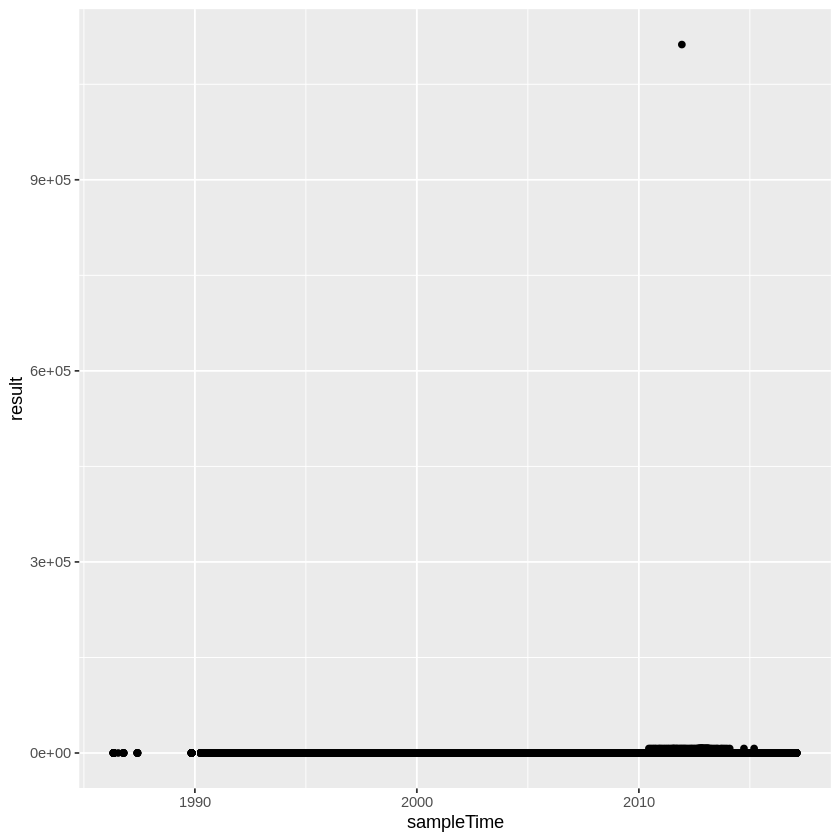

In [56]:
# Let's just take a quick and dirty look at all of our results
ggplot(filtered_tib,mapping=aes(x=sampleTime, y=result)) +
  geom_point()

In [57]:
# There's clearly one large outlier
subset(filtered_tib,result>1000000)

siteName,siteType,sampleTime,parameterType,parameter,result,unit
<chr>,<fct>,<dttm>,<fct>,<fct>,<dbl>,<fct>
JTMEC Well B-8B,Well,2011-12-09,Conventionals,WATER TEMPERATURE,1112340,Deg. Celsius


In [59]:
remove_id <- which(filtered_tib$result>1000000 | is.na(filtered_tib$result))
filtered_tib <- filtered_tib[-remove_id,]

In [60]:
summary(filtered_tib)

   siteName                                      siteType    
 Length:51795       Stream                           :24090  
 Class :character   Lake                             :16852  
 Mode  :character   Spring                           : 7248  
                    Well                             : 1606  
                    Soil                             : 1591  
                    Non-spatial or Protected Location:  218  
                    (Other)                          :  190  
   sampleTime                                 parameterType  
 Min.   :1986-05-01 13:35:00   Alkalinity/Hardness/pH:25623  
 1st Qu.:1997-05-29 09:25:30   Conventionals         :26172  
 Median :2002-03-12 09:30:00                                 
 Mean   :2003-06-19 09:48:08                                 
 3rd Qu.:2009-12-16 11:37:30                                 
 Max.   :2017-02-09 14:00:00                                 
                                                             
        

In [61]:
# Still some very high values, so let's repeat
subset(filtered_tib,result>1000)

siteName,siteType,sampleTime,parameterType,parameter,result,unit
<chr>,<fct>,<dttm>,<fct>,<fct>,<dbl>,<fct>
JTMEC Well B-10C,Well,2013-12-19,Conventionals,WATER TEMPERATURE,7102.41,Deg. Celsius
JTMEC Well B-10C,Well,2013-09-10,Conventionals,WATER TEMPERATURE,7100.96,Deg. Celsius
JTMEC Well B-10C,Well,2013-07-23,Conventionals,WATER TEMPERATURE,7101.51,Deg. Celsius
JTMEC Well B-10C,Well,2013-06-25,Conventionals,WATER TEMPERATURE,7101.27,Deg. Celsius
JTMEC Well B-10C,Well,2013-05-21,Conventionals,WATER TEMPERATURE,7102.40,Deg. Celsius
JTMEC Well B-10C,Well,2013-04-16,Conventionals,WATER TEMPERATURE,7101.28,Deg. Celsius
JTMEC Well B-10C,Well,2013-03-19,Conventionals,WATER TEMPERATURE,7102.40,Deg. Celsius
JTMEC Well B-10C,Well,2013-02-26,Conventionals,WATER TEMPERATURE,7102.39,Deg. Celsius
JTMEC Well B-10C,Well,2013-02-19,Conventionals,WATER TEMPERATURE,7102.40,Deg. Celsius


In [62]:
remove <- which(filtered_tib$result>1000 | is.na(filtered_tib$result))
filtered_tib <- filtered_tib[-remove,]

summary(filtered_tib)

   siteName                                      siteType    
 Length:51722       Stream                           :24090  
 Class :character   Lake                             :16852  
 Mode  :character   Spring                           : 7248  
                    Soil                             : 1591  
                    Well                             : 1533  
                    Non-spatial or Protected Location:  218  
                    (Other)                          :  190  
   sampleTime                                 parameterType  
 Min.   :1986-05-01 13:35:00   Alkalinity/Hardness/pH:25623  
 1st Qu.:1997-05-20 01:13:45   Conventionals         :26099  
 Median :2002-03-06 10:50:00                                 
 Mean   :2003-06-14 17:54:40                                 
 3rd Qu.:2009-12-16 07:42:00                                 
 Max.   :2017-02-09 14:00:00                                 
                                                             
        

# Data Visualization

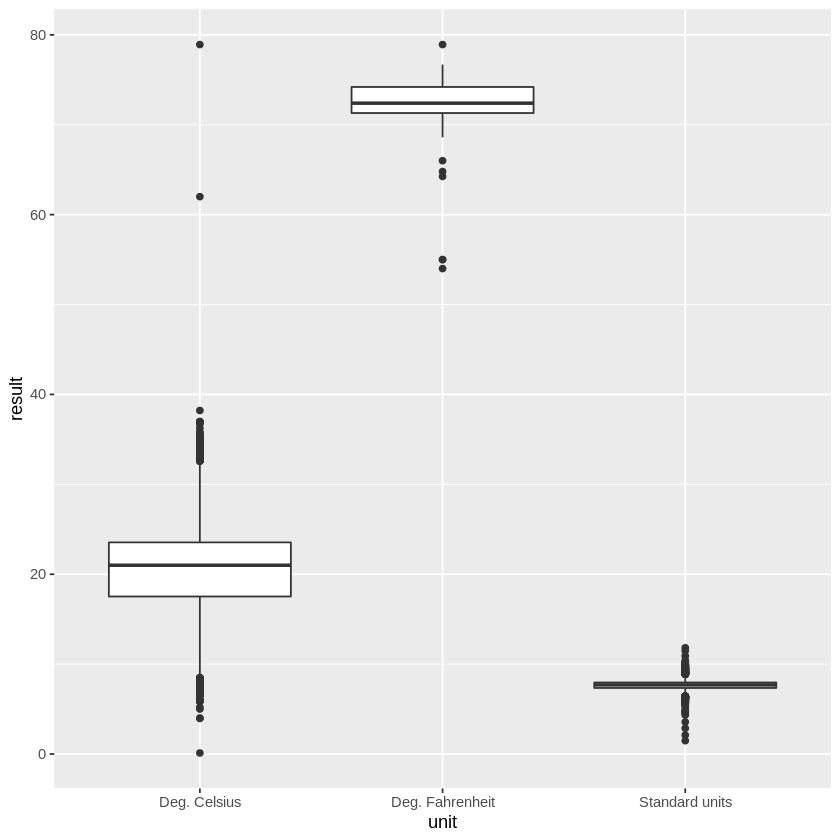

In [64]:
# That looks better.  Let's drill into some boxplots now
ggplot(data=filtered_tib, mapping = aes(x=unit,y=result)) + geom_boxplot()

In [66]:
# Those Celsius values over 60 should probably  be Fahrenheit
# Because 60 degrees Celsius is 140 degrees Fahrenheit!

convert <- which(filtered_tib$result>60 & filtered_tib$unit=='Deg. Celsius')
filtered_tib$unit[convert] <- 'Deg. Fahrenheit'

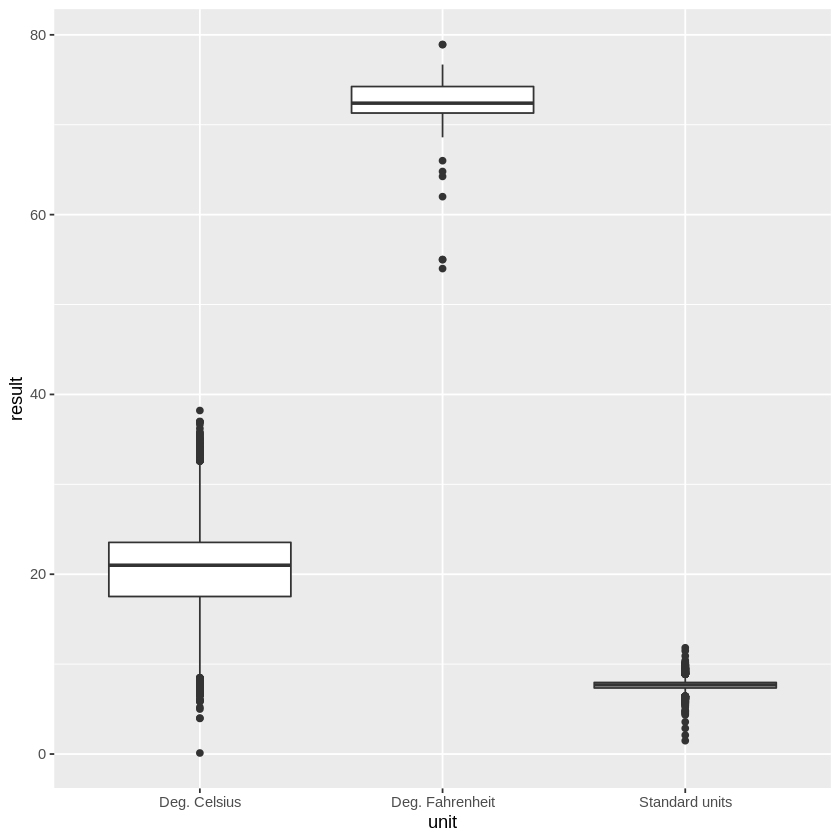

In [67]:
# Let's look at the boxplots again
ggplot(data=filtered_tib, mapping = aes(x=unit,y=result)) + geom_boxplot()

In [68]:
# convert from Fahrenheit to Celsius
fahrenheit <- which(filtered_tib$unit=='Deg. Fahrenheit')
filtered_tib$result[fahrenheit] <- (filtered_tib$result[fahrenheit] - 32) * (5/9)

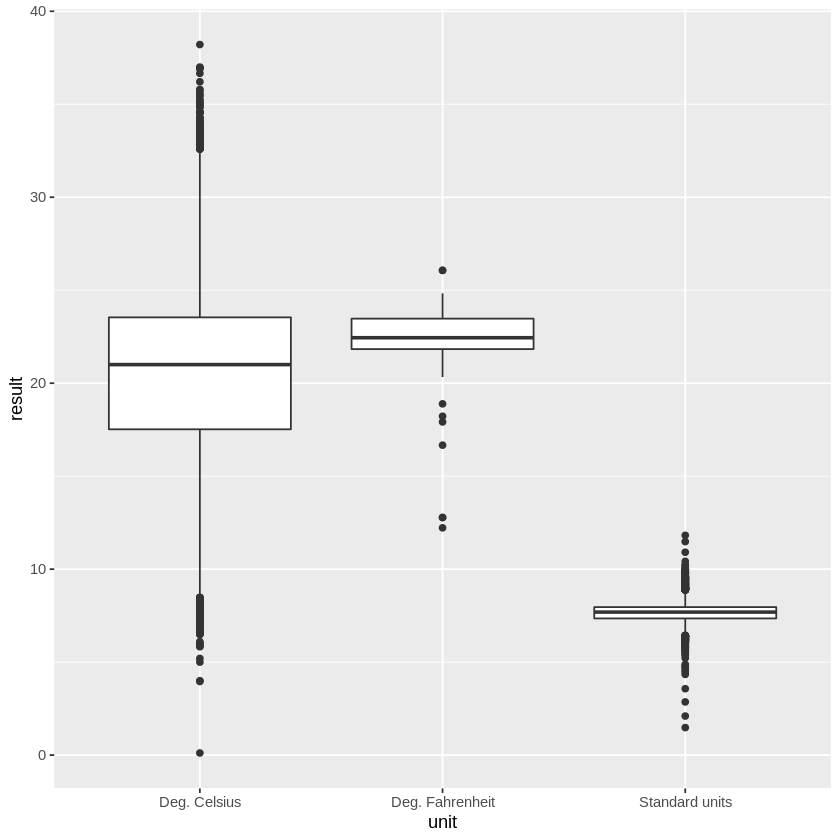

In [69]:
ggplot(data=filtered_tib, mapping = aes(x=unit,y=result)) + geom_boxplot()

In [70]:
# We just need to fix up the unit values
filtered_tib$unit[fahrenheit] <- 'Deg. Celsius'

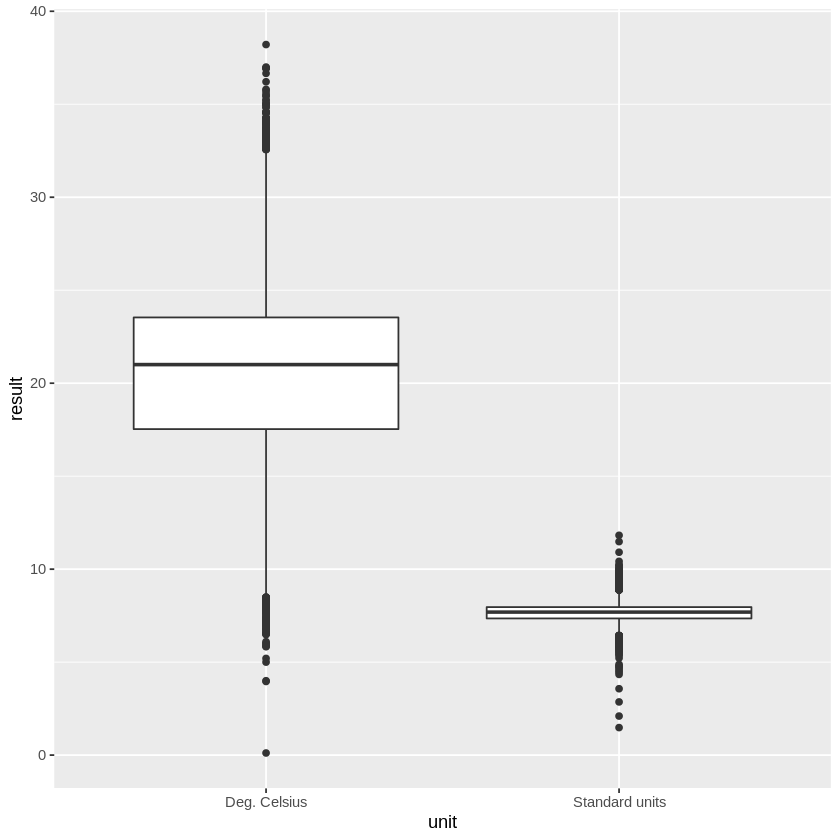

In [71]:
ggplot(data=filtered_tib, mapping = aes(x=unit,y=result)) + geom_boxplot()

In [72]:
summary(filtered_tib)

   siteName                                      siteType    
 Length:51722       Stream                           :24090  
 Class :character   Lake                             :16852  
 Mode  :character   Spring                           : 7248  
                    Soil                             : 1591  
                    Well                             : 1533  
                    Non-spatial or Protected Location:  218  
                    (Other)                          :  190  
   sampleTime                                 parameterType  
 Min.   :1986-05-01 13:35:00   Alkalinity/Hardness/pH:25623  
 1st Qu.:1997-05-20 01:13:45   Conventionals         :26099  
 Median :2002-03-06 10:50:00                                 
 Mean   :2003-06-14 17:54:40                                 
 3rd Qu.:2009-12-16 07:42:00                                 
 Max.   :2017-02-09 14:00:00                                 
                                                             
        

In [74]:
# Still some empty factor levels, remove them
filtered_tib$unit <- droplevels(filtered_tib$unit)
summary(filtered_tib)

   siteName                                      siteType    
 Length:51722       Stream                           :24090  
 Class :character   Lake                             :16852  
 Mode  :character   Spring                           : 7248  
                    Soil                             : 1591  
                    Well                             : 1533  
                    Non-spatial or Protected Location:  218  
                    (Other)                          :  190  
   sampleTime                                 parameterType  
 Min.   :1986-05-01 13:35:00   Alkalinity/Hardness/pH:25623  
 1st Qu.:1997-05-20 01:13:45   Conventionals         :26099  
 Median :2002-03-06 10:50:00                                 
 Mean   :2003-06-14 17:54:40                                 
 3rd Qu.:2009-12-16 07:42:00                                 
 Max.   :2017-02-09 14:00:00                                 
                                                             
        

# Widening the tibble

In [75]:
head(filtered_tib)

siteName,siteType,sampleTime,parameterType,parameter,result,unit
<chr>,<fct>,<dttm>,<fct>,<fct>,<dbl>,<fct>
North Branch of Sycamore Creek @ Foster Ranch Rd,Stream,2015-01-21 12:00:00,Alkalinity/Hardness/pH,PH,8.35,Standard units
North Branch of Sycamore Creek @ Foster Ranch Rd,Stream,2015-01-21 12:00:00,Conventionals,WATER TEMPERATURE,11.73,Deg. Celsius
Rimrock Spring 67,Spring,2015-01-21 11:30:00,Alkalinity/Hardness/pH,PH,7.82,Standard units
Barton Scenic Bluff Spring,Spring,2015-01-21 09:45:00,Conventionals,WATER TEMPERATURE,18.29,Deg. Celsius
Barton Creek Downstream of Lost Creek Blvd,Stream,2015-01-14 13:31:00,Alkalinity/Hardness/pH,PH,8.15,Standard units
Barton Creek @ Ogletree Pool,Stream,2015-01-14 12:32:00,Alkalinity/Hardness/pH,PH,8.09,Standard units


In [77]:
# Remove parameterType and unit
filtered_tib <- filtered_tib[,-c(4,7)]

In [78]:
head(filtered_tib)

siteName,siteType,sampleTime,parameter,result
<chr>,<fct>,<dttm>,<fct>,<dbl>
North Branch of Sycamore Creek @ Foster Ranch Rd,Stream,2015-01-21 12:00:00,PH,8.35
North Branch of Sycamore Creek @ Foster Ranch Rd,Stream,2015-01-21 12:00:00,WATER TEMPERATURE,11.73
Rimrock Spring 67,Spring,2015-01-21 11:30:00,PH,7.82
Barton Scenic Bluff Spring,Spring,2015-01-21 09:45:00,WATER TEMPERATURE,18.29
Barton Creek Downstream of Lost Creek Blvd,Stream,2015-01-14 13:31:00,PH,8.15
Barton Creek @ Ogletree Pool,Stream,2015-01-14 12:32:00,PH,8.09


In [79]:
filtered_tib_wide <- spread(filtered_tib,parameter,result)
filtered_tib_wide

ERROR: ignored

In [81]:
# Some duplicate rows
filtered_tib[c(49274, 49342,49219,49284),]

siteName,siteType,sampleTime,parameter,result
<chr>,<fct>,<dttm>,<fct>,<dbl>
Avery Deer Spring,Spring,2011-05-19 00:00:00,PH,6.93
Avery Deer Spring,Spring,2011-05-19 00:00:00,PH,6.92
Avery Deer Spring,Spring,2011-11-02 10:32:00,PH,7.01
Avery Deer Spring,Spring,2011-11-02 10:32:00,PH,6.96


In [82]:
# It looks like there are indeed duplicate measurements in the dataset
# Let's find all of them.  I'll start by building a tibble that excludes the result data
dupe_check<-filtered_tib[,-5]

In [83]:
# And now lets find which records are duplicates
dupes <- which(duplicated(dupe_check))

In [84]:
dupes

[1]    19   633   635   682   690   936  1125  1683  1685  1724  1752  1753
   [13]  1754  1755  1756  1757  1758  1759  1760  1761  1762  1763  1764  1765
   [25]  1767  1768  1769  1770  1771  1772  1773  1774  1775  1776  1777  1778
   [37]  1779  1780  1956  1994  1996  2167  2599  2601  3230  3233  3236  3241
   [49]  3337  3339  3668  3670  4004  4005  4006  4008  4009  4010  4154  4155
   [61]  4156  4157  4158  4160  4161  4162  4163  4164  4271  4273  4385  4387
   [73]  5440  5457  5481  5483  5585  5587  5865  5867  5897  5899  5901  5903
   [85]  5906  5998  6276  6278  6407  6409  6415  6417  6419  6421  6442  6519
   [97]  6559  6669  6781  7007  7034  7087  7091  7097  7127  7131  7216  7236
  [109]  7242  7250  7259  7289  7334  7351  7365  7374  7408  7411  7412  7413
  [121]  7415  7416  7486  7634  7636  7802  8236  8238  8526  8721  8728  8872
  [133]  9357  9358 11979 12017 12019 12021 12023 12034 12036 12373 12868 13068
  [145] 13351 13637 13961 13963 13964 13966 13968 13999 14001 14003 14005 14024
  [157] 14026 14055 14057 14766 15383 15387 15425 15427 15441 15446 15449 15456
  [169] 15461 15468 15518 15521 15526 15557 15564 15566 15585 15586 15588 15589
  [181] 16554 16556 16867 16869 16953 17016 17023 17024 17035 17040 17041 17043
  [193] 17044 17045 17046 17047 17048 17370 17397 17400 17402 17411 17413 18087
  [205] 18089 18091 18093 18095 18097 18099 18101 18103 18105 18107 18109 18138
  [217] 18482 18489 18514 18895 18897 18910 18911 18912 18913 18914 18915 18916
  [229] 18917 18919 18920 18921 18922 18923 18924 18925 18926 18928 18929 18930
  [241] 18931 18932 18933 18935 18936 18937 18938 18939 18940 18942 18943 18944
  [253] 18945 18946 18948 18949 18950 18951 18952 18956 18957 18958 18959 18961
  [265] 18962 18963 18964 18968 18969 18970 18971 18973 18974 18975 18976 18978
  [277] 18979 18980 18981 18982 18984 18985 18986 18987 18988 18990 18991 18992
  [289] 18993 18995 18996 18997 18998 19002 19003 19004 19005 19007 19008 19009
  [301] 19010 19014 19015 19016 19017 19018 19019 19021 19022 19023 19024 19025
  [313] 19026 19034 19035 19036 19037 19039 19040 19041 19042 19044 19045 19046
  [325] 19047 19049 19050 19051 19052 19054 19055 19056 19057 19058 19059 19060
  [337] 19062 19063 19064 19065 19066 19067 19068 19070 19071 19072 19073 19075
  [349] 19076 19077 19078 19080 19081 19082 19083 19085 19086 19087 19088 19090
  [361] 19091 19092 19093 19094 19095 19096 19098 19099 19100 19101 19102 19103
  [373] 19104 19106 19107 19108 19109 19110 19112 19113 19114 19115 19116 19118
  [385] 19119 19120 19122 19123 19124 19125 19129 19130 19131 19132 19133 19134
  [397] 19135 19137 19138 19139 19140 19141 19142 19143 19145 19146 19147 19148
  [409] 19149 19150 19151 19152 19154 19155 19156 19157 19158 19159 19160 19161
  [421] 19163 19164 19165 19166 19167 19169 19170 19171 19172 19173 19175 19176
  [433] 19177 19178 19179 19180 19182 19183 19184 19185 19186 19187 19197 19198
  [445] 19199 19200 19202 19203 19204 19205 19207 19208 19209 19210 19211 19213
  [457] 19214 19215 19216 19217 19219 19220 19221 19222 19223 19224 19225 19227
  [469] 19228 19229 19230 19231 19232 19233 19235 19236 19237 19238 19240 19241
  [481] 19242 19243 19245 19246 19247 19248 19250 19251 19252 19253 19255 19256
  [493] 19257 19258 19259 19260 19262 19263 19264 19265 19266 19267 19268 19270
  [505] 19271 19272 19273 19275 19276 19277 19278 19280 19281 19282 19283 19284
  [517] 19286 19287 19288 19289 19290 19292 19293 19294 19295 19296 19297 19298
  [529] 19300 19301 19302 19303 19304 19305 19306 19310 19311 19312 19313 19314
  [541] 19316 19317 19318 19319 19320 19322 19323 19324 19325 19326 19328 19329
  [553] 19330 19331 19332 19334 19335 19336 19337 19338 19339 19340 19342 19343
  [565] 19344 19345 19346 19347 19348 19366 19367 19368 19369 19371 19372 19373
  [577] 19374 19376 19377 19378 19379 19380 19382 19383 19384 19385 19386 19388
  [589] 19389 19390 19391 19392 19393 19394 19396 19397 19398 19399 19400 19401
  [6

In [86]:
# And remove those
filtered_tib <- filtered_tib[-dupes,]

In [88]:
# and then retry the spread
filtered_tib_wide <- spread(filtered_tib,parameter,result)
filtered_tib_wide

siteName,siteType,sampleTime,PH,WATER TEMPERATURE
<chr>,<fct>,<dttm>,<dbl>,<dbl>
58-50-215 Sunset Valley,Well,1986-07-18 00:00:00,8.10,NA
58-50-2CW Pickard (58-50-230),Well,2010-05-12 12:40:00,7.18,NA
58-50-2CW Pickard (58-50-230),Well,2010-05-26 14:50:00,7.14,22.77
58-50-2CW Pickard (58-50-230),Well,2010-06-17 09:50:00,7.28,22.77
58-50-2CW Pickard (58-50-230),Well,2010-06-23 09:25:00,7.22,22.72
58-50-4AB Bricker,Well,2010-05-11 12:30:00,6.65,23.37
58-50-4AB Bricker,Well,2010-05-14 16:30:00,7.00,22.06
58-50-4AB Bricker,Well,2010-05-17 15:00:00,7.02,22.92
58-50-4AB Bricker,Well,2010-05-19 14:35:00,7.08,22.80


In [89]:
glimpse(filtered_tib_wide)

Rows: 21,950
Columns: 5
$ siteName            <chr> "58-50-215 Sunset Valley", "58-50-2CW Pickard (58-…
$ siteType            <fct> Well, Well, Well, Well, Well, Well, Well, Well, We…
$ sampleTime          <dttm> 1986-07-18 00:00:00, 2010-05-12 12:40:00, 2010-05…
$ PH                  <dbl> 8.10, 7.18, 7.14, 7.28, 7.22, 6.65, 7.00, 7.02, 7.…
$ `WATER TEMPERATURE` <dbl> NA, NA, 22.77, 22.77, 22.72, 23.37, 22.06, 22.92, …


In [90]:
colnames(filtered_tib_wide)[4] <- 'pH'
colnames(filtered_tib_wide)[4] <- 'temperature'

In [91]:
glimpse(filtered_tib_wide)

Rows: 21,950
Columns: 5
$ siteName            <chr> "58-50-215 Sunset Valley", "58-50-2CW Pickard (58-…
$ siteType            <fct> Well, Well, Well, Well, Well, Well, Well, Well, We…
$ sampleTime          <dttm> 1986-07-18 00:00:00, 2010-05-12 12:40:00, 2010-05…
$ temperature         <dbl> 8.10, 7.18, 7.14, 7.28, 7.22, 6.65, 7.00, 7.02, 7.…
$ `WATER TEMPERATURE` <dbl> NA, NA, 22.77, 22.77, 22.72, 23.37, 22.06, 22.92, …
